# Exploratory Data Analysis (EDA)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [2]:
cat = pd.read_pickle("../data/cat_quality.pickle")
num = pd.read_pickle("../data/num_quality.pickle")

## Categorical EDA

### Statistical analysis

In [3]:
def cat_frequencies(df_cat):
    '''''
    Function that counts for each variable the frequency percentage of each
    record of a variable. Returns a new dataframe with 3 features, being the
    first the name of the variables, the second the value of each variable and
    a final feature with the normalized frequency of that value for that given
    variable.
    '''''
    output = df_cat.apply(lambda x: x.value_counts(normalize=True)).T.stack()\
            .to_frame().reset_index()\
            .rename(columns={"level_0":"Variable","level_1":"Value", 0: "Frequency"})\
                .sort_values(by = ["Variable","Frequency"])
    
    return (output)

In [4]:
# For this counting we're going to delete the "d" variable which is just the
# number of the day.
cat.columns.to_list()

['store_id',
 'item_id',
 'd',
 'year',
 'month',
 'wday',
 'weekday',
 'event_name_1',
 'event_type_1']

In [5]:
cat_variables = cat.columns.to_list()
del cat_variables[2]

In [6]:
pd.set_option('display.max_rows', None)
cat_frequencies(cat[cat_variables])

,Variable,Value,Frequency
41,event_name_1,Chanukah End,0.001880
42,event_name_1,Christmas,0.001880
43,event_name_1,Cinco De Mayo,0.001880
48,event_name_1,Father's day,0.001880
61,event_name_1,OrthodoxEaster,0.001880
44,event_name_1,ColumbusDay,0.002820
45,event_name_1,Easter,0.002820
46,event_name_1,Eid al-Fitr,0.002820
47,event_name_1,EidAlAdha,0.002820
49,event_name_1,Halloween,0.002820


#### Nothing to highlight from here.

In [7]:
pd.set_option('display.max_rows', 6)

### Graphical analysis

In [8]:
def categorical_eda_plots(cat):
    '''''
    Function that makes bar plots from every variable belonging to a dataframe.
    '''''
    
    #Compute the number of rows for the whole figure
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    #Define figure
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))
    ax = ax.flat 

    #Plot for all the variables and set titles and ticks
    for i, j in enumerate(cat):
        cat[j].value_counts().plot.barh(ax = ax[i])
        ax[i].set_title(j, fontsize = 12, fontweight = "bold")
        ax[i].tick_params(labelsize = 12)

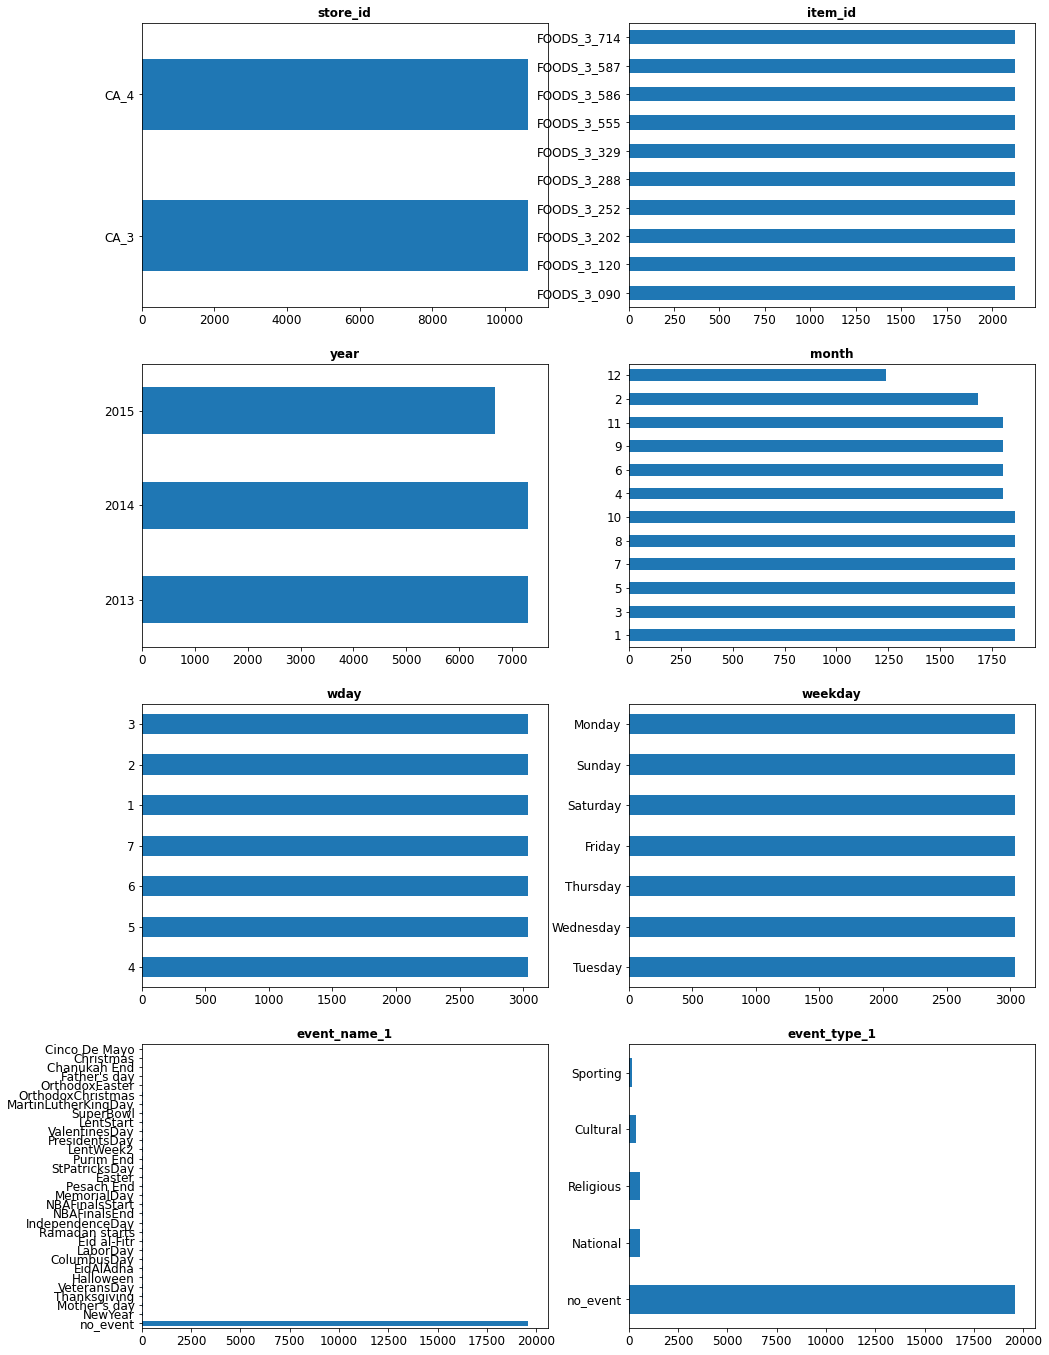

In [9]:
categorical_eda_plots(cat[cat_variables])

#### Nothing to highlight from here.

## Numerical EDA

### Statistical analysis

In [10]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
sales,21280.0,28.874577,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21280.0,2.394261,1.236042,1.0,1.5,1.58,2.98,4.98


### Graphical analysis

#### In this case it makes sense to make some EDA around sales and sell_price.

In [11]:
df = pd.concat([cat,num], axis=1)
df

,store_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1,wm_yr_wk,sales,sell_price
date,,,,,,,,,,,,
2013-01-01,CA_3,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,1.25
2013-01-01,CA_3,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National,11249,33,1.25
2013-01-01,CA_3,FOODS_3_202,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30,CA_4,FOODS_3_586,d_1767,2015,11,3,Monday,no_event,no_event,11544,13,2.48
2015-11-30,CA_4,FOODS_3_587,d_1767,2015,11,3,Monday,no_event,no_event,11544,11,1.58
2015-11-30,CA_4,FOODS_3_714,d_1767,2015,11,3,Monday,no_event,no_event,11544,9,1.58


### What have been the total sales during the whole period?

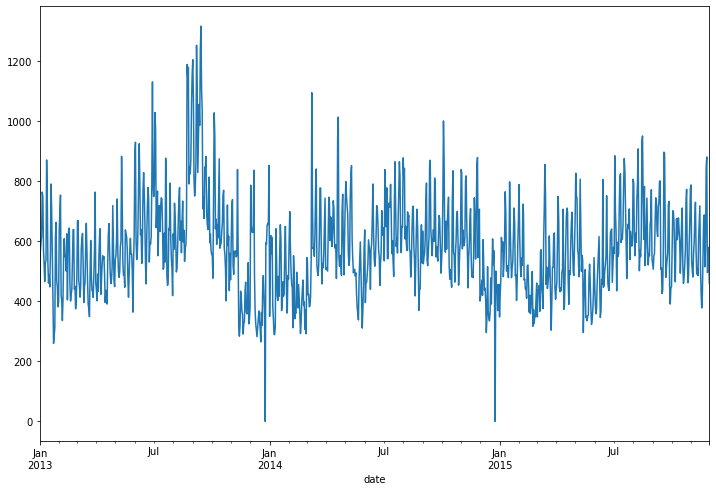

In [12]:
df.groupby("date")["sales"].sum().plot(figsize=(12,8));

### What were the sales of each product?

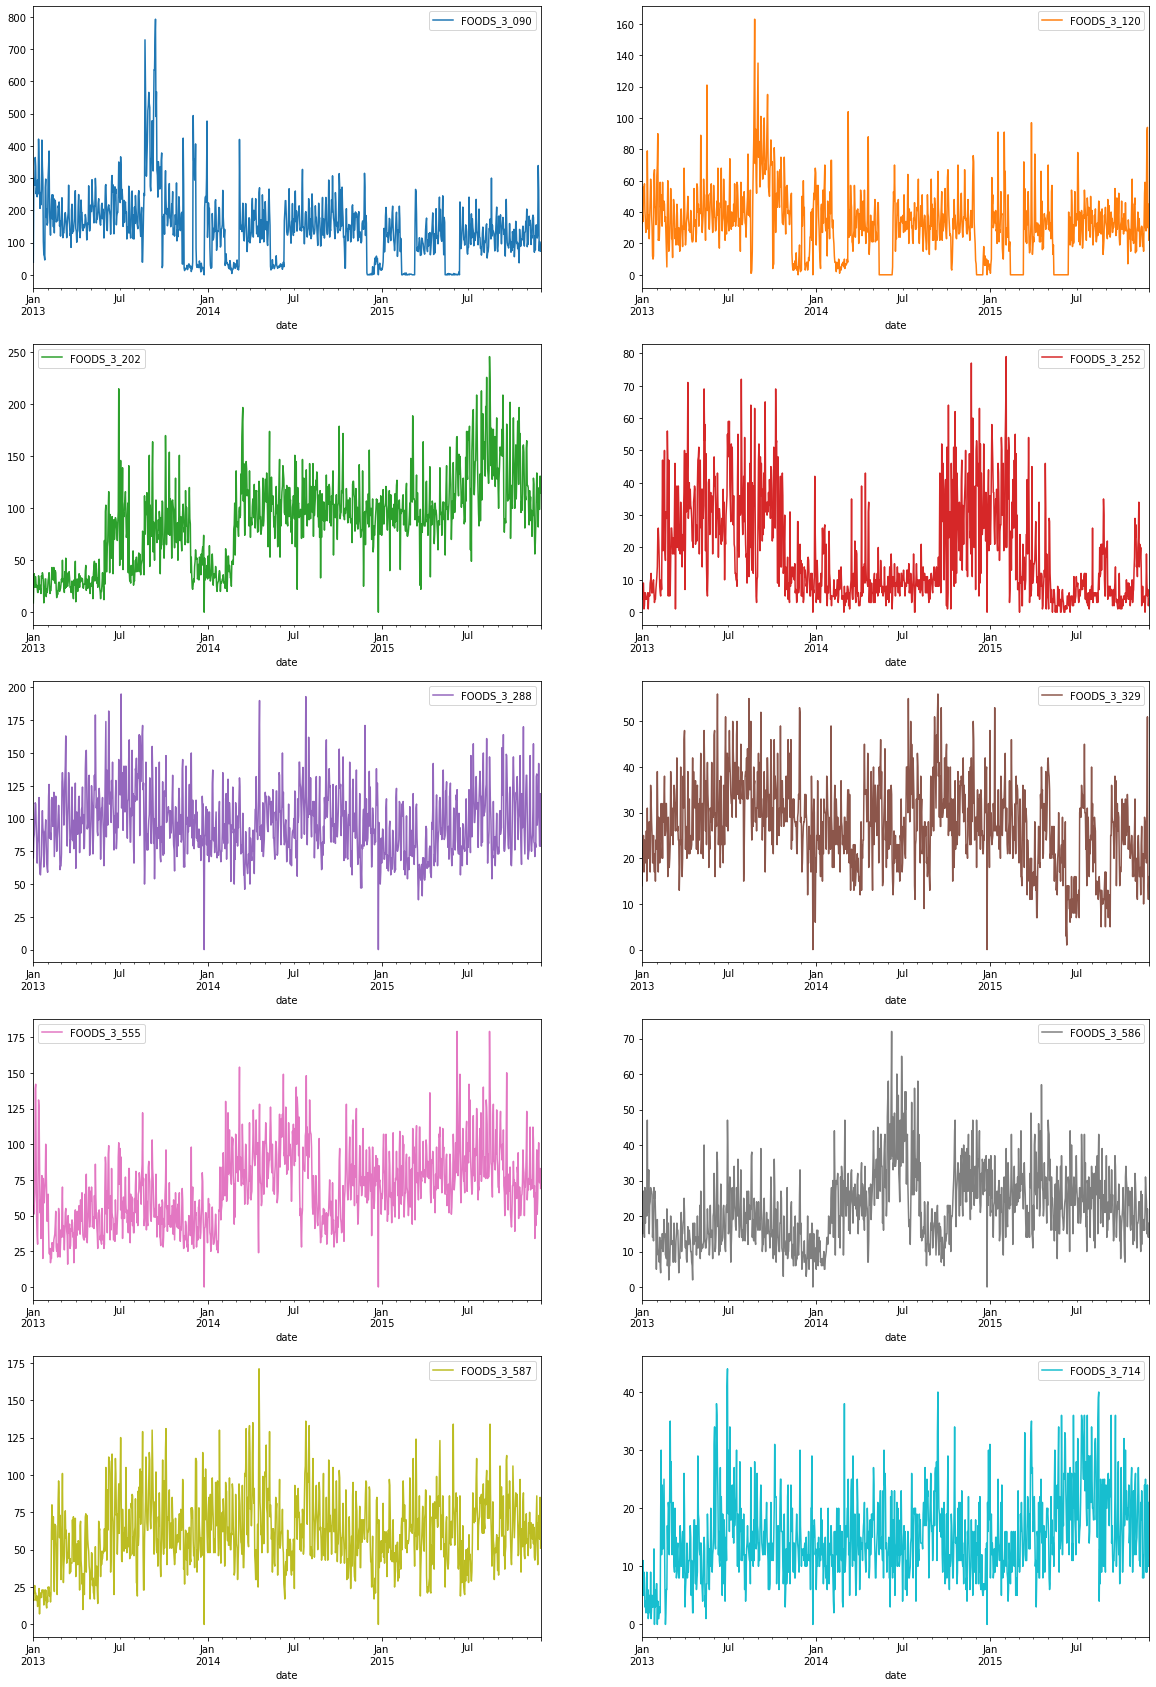

In [13]:
df.groupby(["date","item_id"])["sales"].sum().unstack().plot(subplots=True, layout=(5,2), figsize=(20,30), sharex=False);

### What were the sales of each product by store?

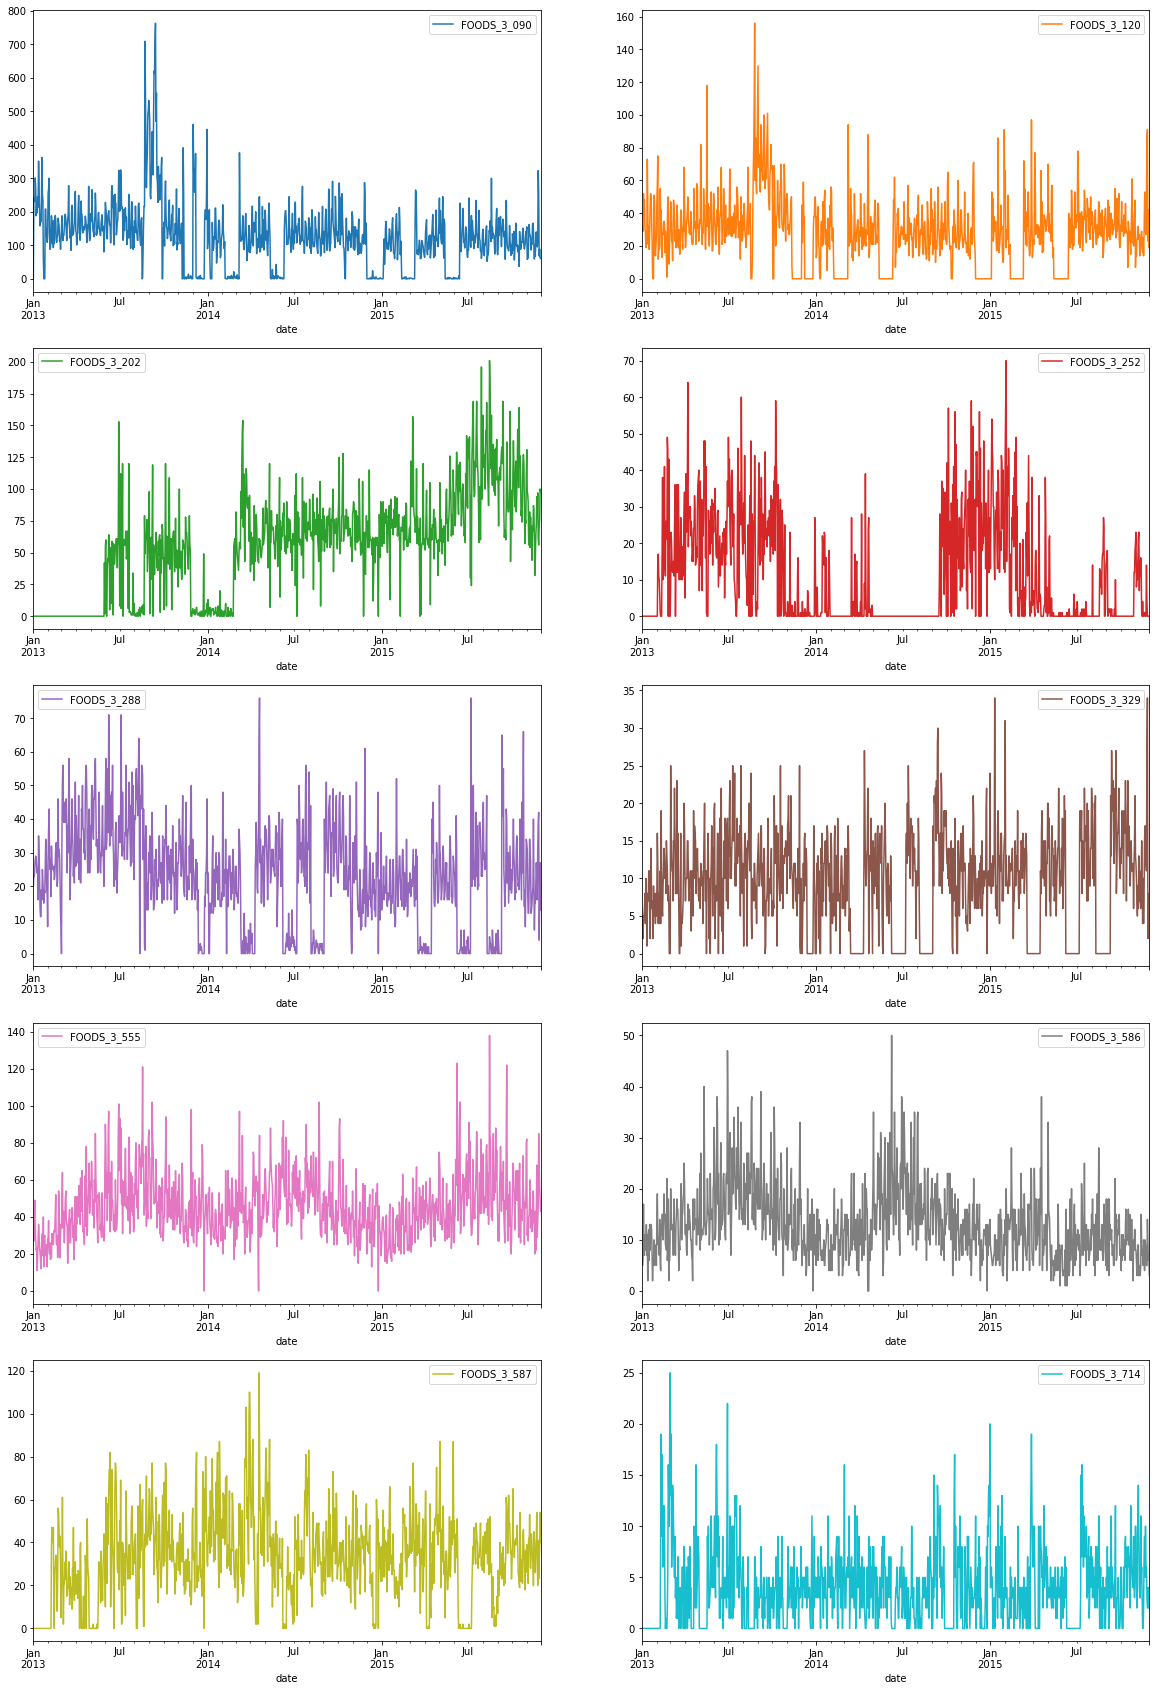

In [14]:
df.loc[df["store_id"] == "CA_3"].groupby(["date","item_id"])["sales"].sum().unstack().plot(subplots=True, layout=(5,2), figsize=(20,30), sharex=False);

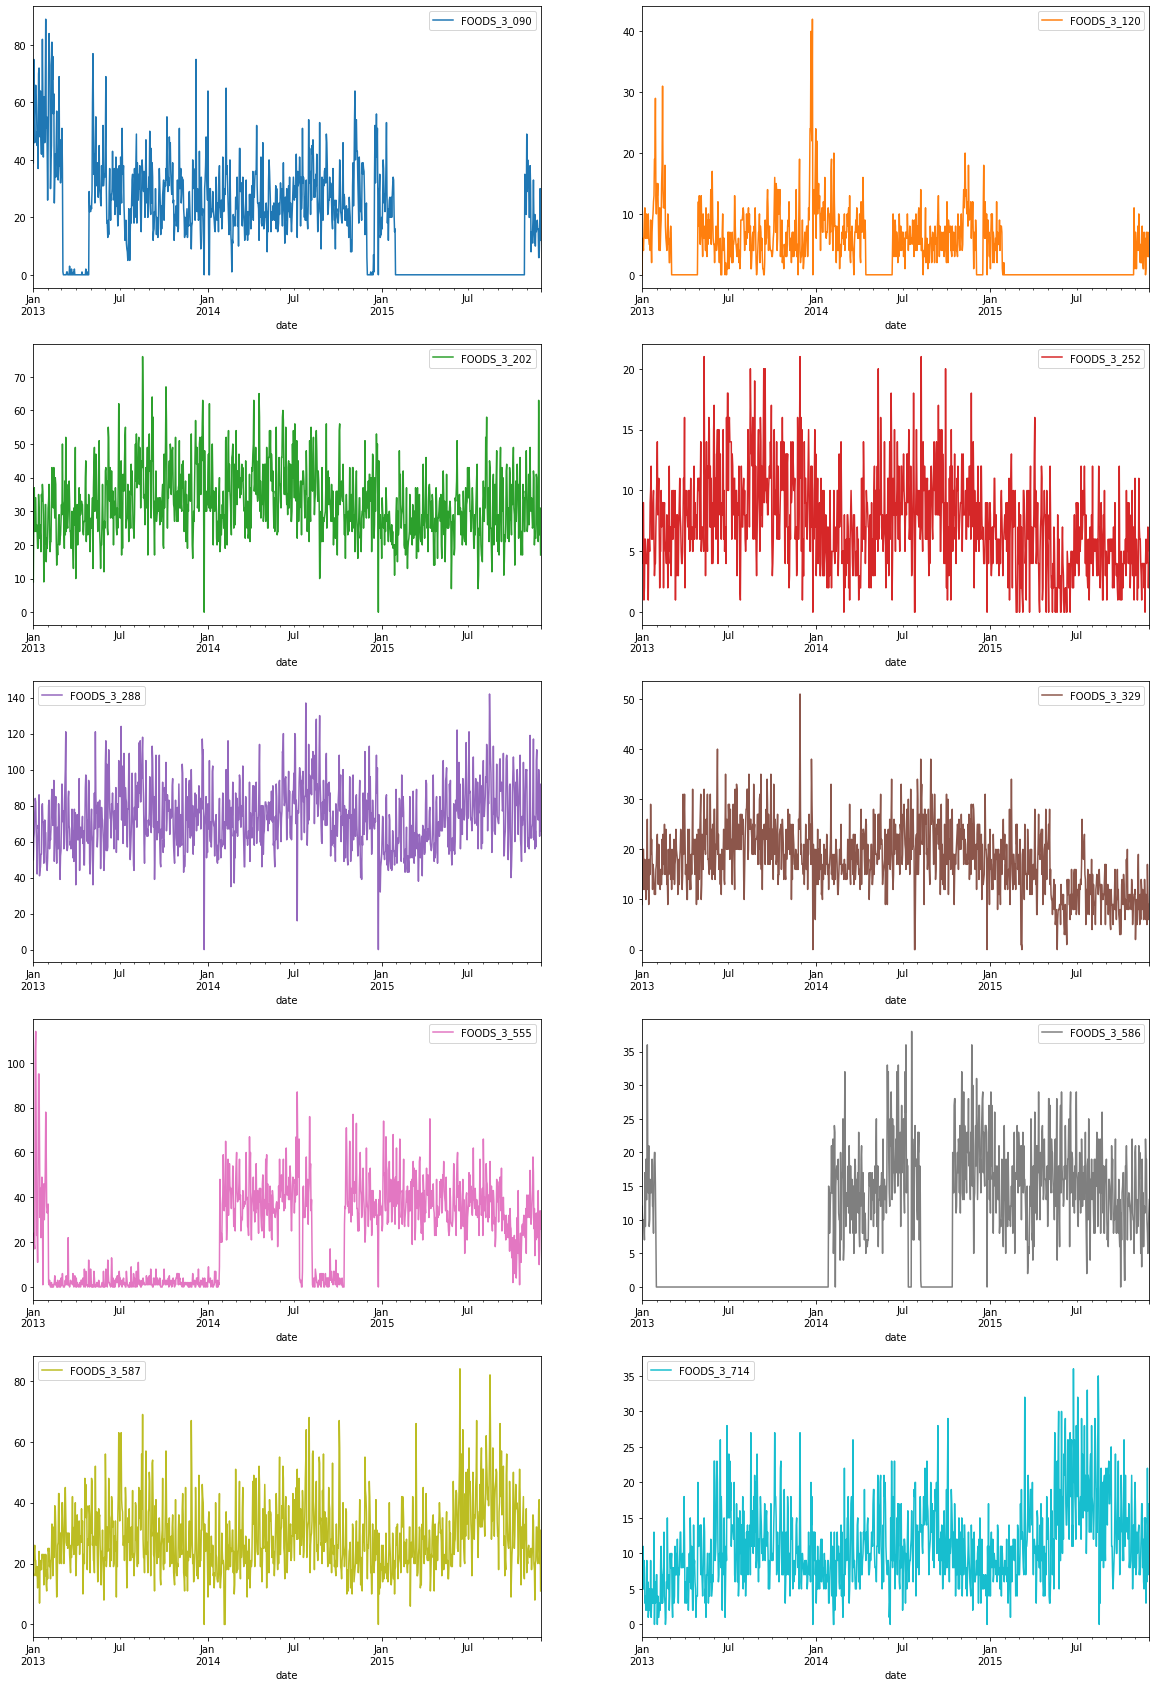

In [15]:
df.loc[df["store_id"] == "CA_4"].groupby(["date","item_id"])["sales"].sum().unstack().plot(subplots=True, layout=(5,2), figsize=(20,30), sharex=False);

#### Conclusions:

- There is a hierarchical structure between store and product (top to bottom)
- Some products have no sales during certain periods of time
- That might indicate there's intermitend demand from some products
    - Stock outage, lack of demand, product out of sale

#### Actions to take from here:

- Create ML models from store to product
- Create a variable that follows the intermitent demand effect on each product
- Use an ML algorithm based on trees (fast models): XGBoost or LightGBM

### How does the price change for each product over time?

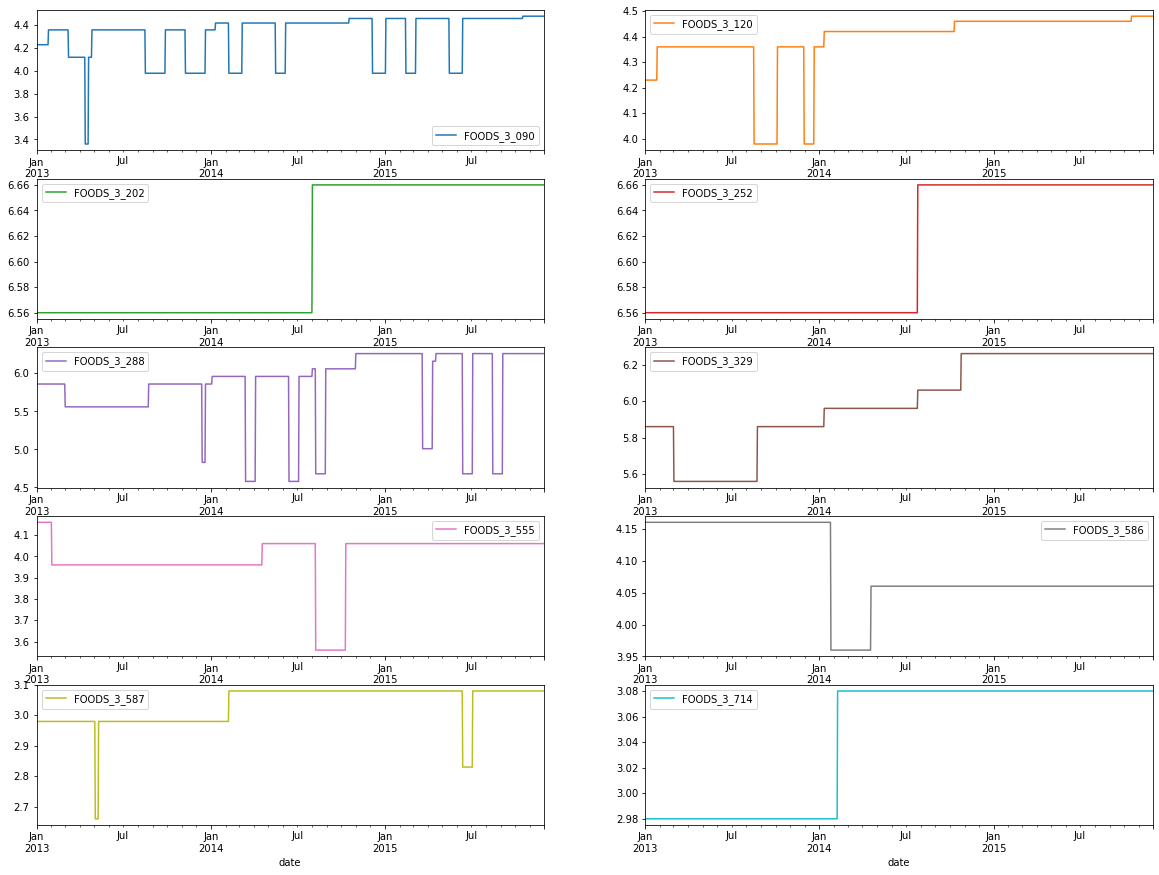

In [16]:
df.groupby(["date","item_id"])["sell_price"].sum().unstack().plot(subplots=True, sharex=False, layout=(5,2), figsize=(20,15));

#### Conclusions:

- Prices change quite a lot
- It looks like there are many selling offers
- It would be very useful to have a pricing promotion calendar

### Sales of each product by month

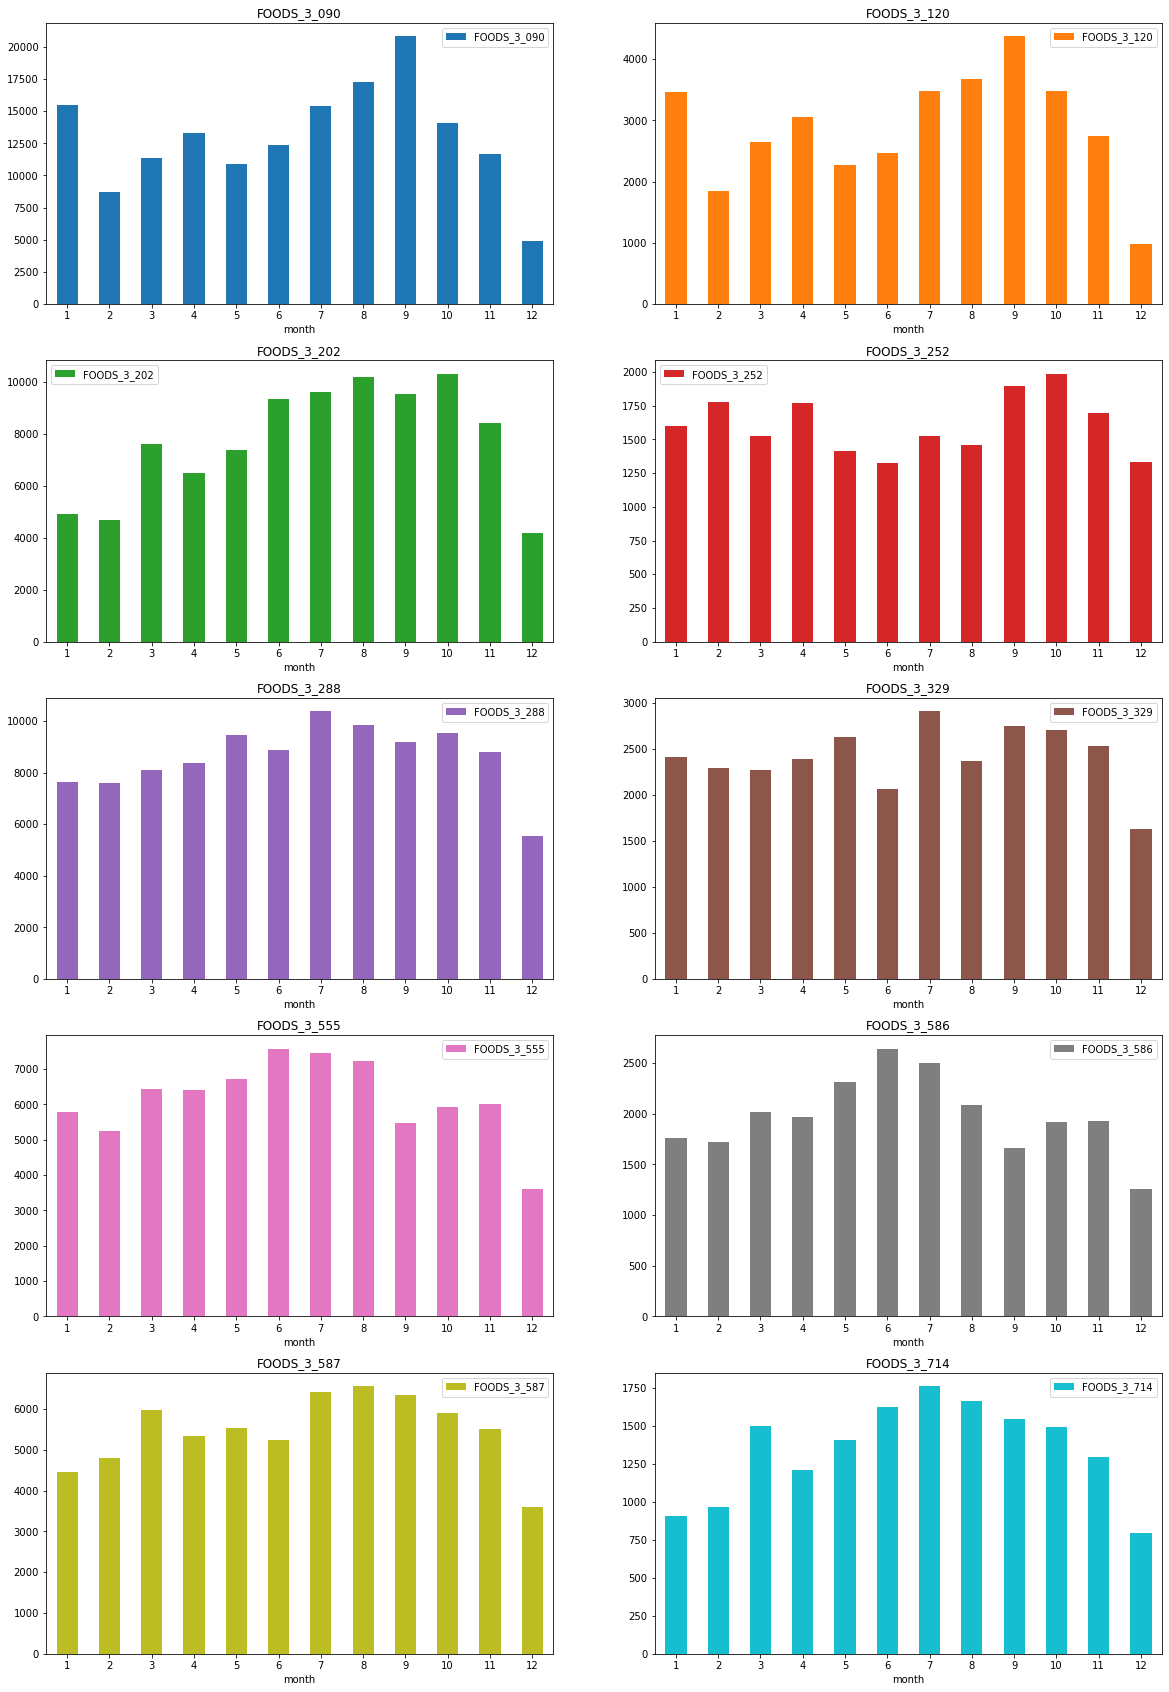

In [17]:
df.groupby(["month","item_id"])["sales"].sum().unstack().plot(kind="bar", subplots=True, layout=(5,2), sharex=False, figsize=(20,30), rot=0);

### Sales of each product by month

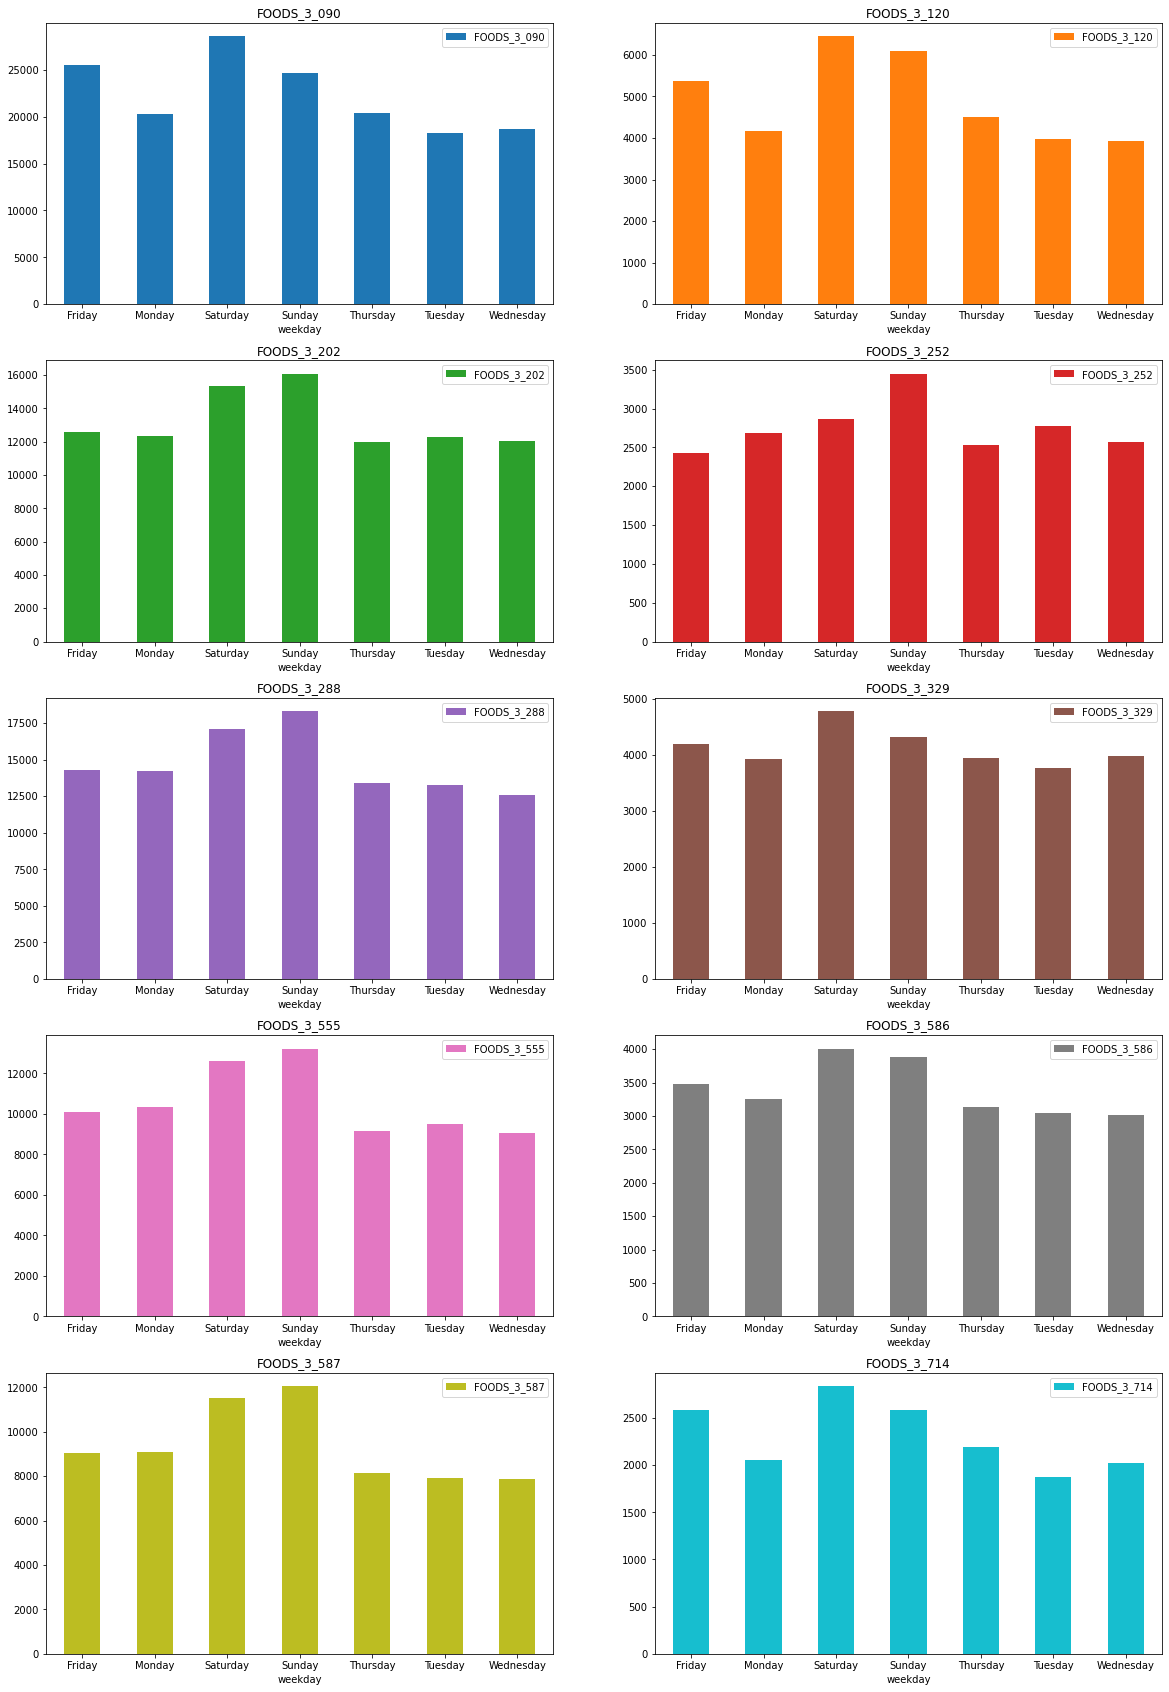

In [18]:
df.groupby(["weekday","item_id"])["sales"].sum().unstack().plot(kind="bar", subplots=True, layout=(5,2), sharex=False, figsize=(20,30), rot=0);

### Sales of each product by event

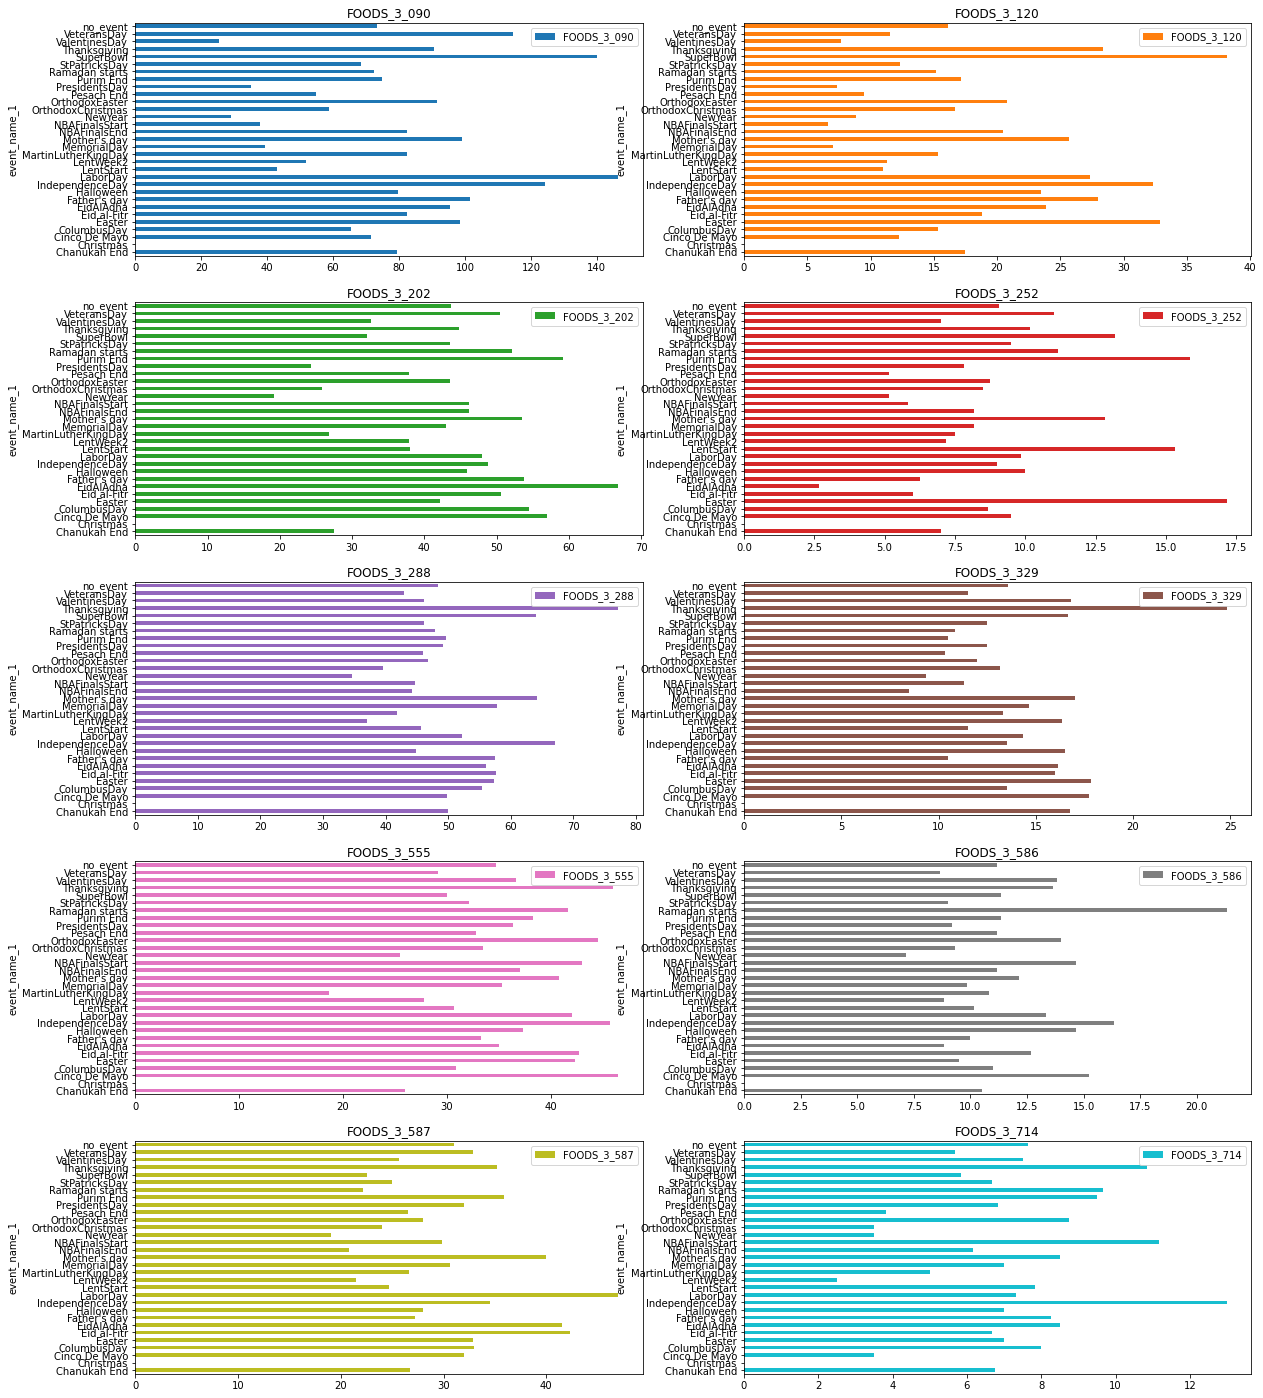

In [19]:
df.groupby(["event_name_1","item_id"])["sales"].mean().unstack().plot(kind="barh",subplots=True, layout=(6,2), sharex=False, figsize=(20,30));

### Sales of each product by type of event

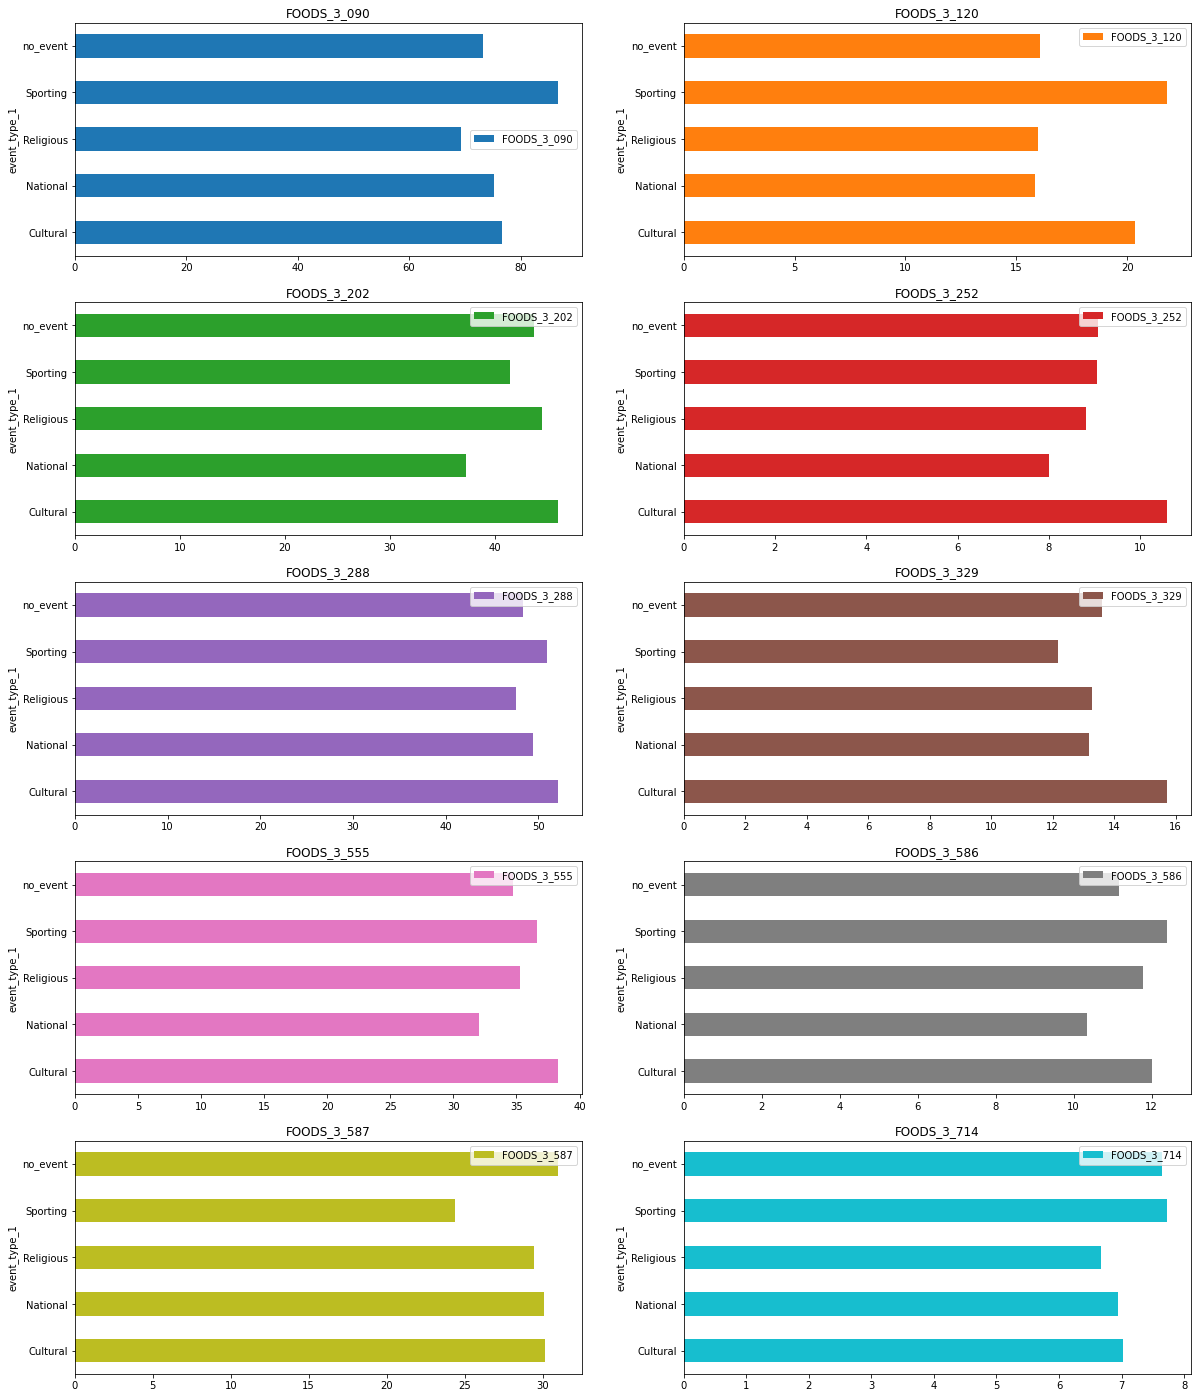

In [20]:
df.groupby(["event_type_1","item_id"])["sales"].mean().unstack().plot(kind="barh",subplots=True, layout=(6,2), sharex=False, figsize=(20,30));

#### All these variables have an effect on the sales. This is good news for the forecasting model we are going to build.

## Save datasets after EDA

In [ ]:
cat.to_pickle("../data/cat_eda.pickle")
num.to_pickle("../data/num_eda.pickle")